# Customer Segmentation

Customer segmentation adalah strategi pemasaran yang mengelompokkan target pasar berdasarkan karakteristik yang sama untuk dikelola secara efektif dan tepat agar mencapai tujuan bisnis yang telah ditetapkan.

### Why Customer Segmentation?
Customer Segmentation jauh lebih dari sekadar menempatkan customer ke dalam suatu kategori. Customer segmentation memungkinkan untuk mempelajari customer lebih dalam dan dengan adanya hal tersebut dapat dilakukan penyesuaian terhadap bisnis yang dijalankan.

### Tujuan
- Membantu untuk menyesuaikan konten bisnis berdasarkan kebutuhan dan karakteristik dari tiap kategori customer.
- Mengetahui perlakuan yang akan diberikan kepada tiap kategori customer

### How?
- Analisa Customer Segmentation
- Mmeberikan Rekomendasi berdasarkan kategori customer

## Method
Analisis RFM adalah teknik pemasaran yang digunakan untuk menganalisis kebiasaan pelanggan seperti kapan terakhir pelanggan membeli (Recency), seberapa sering pelanggan membeli (Frequency), dan berapa banyak uang yang pelanggan belanjakan (Monetary). Metodologi ini bermanfaat dalam segmentasi pelanggan dengan membagi pelanggan ke dalam beberapa kelompok untuk diberikan layanan personal di masa depan dan untuk mengidentifikasi pelanggan yang berpotensi merespon promosi.

### Dataset
https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis

## 1. Import Library

In [ ]:
import pandas as pd
import numpy as np
import scipy.stats as st

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')

# ======== Vizualization ======== 
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

## 2. Import Data

In [ ]:
df = pd.read_csv('marketing_campaign.csv', sep='\t')

In [ ]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

#### Observ
- Data memiliki 28 kolom dan 2240 baris
- Ada missing values pada kolom `Income`
- Akan dilakukan perubahan tipe data datetime pada kolom `Dt_Customer`


## 3. Data Preparation

### 3.1 Checking & Handling Missing Value

In [ ]:
#Checking percentage of null values
check = pd.DataFrame(df.isnull().sum().sort_values(), columns =['Null Values'])
check['Percent'] = (check['Null Values']/df.shape[0])*100
print(check)

                     Null Values   Percent
ID                             0  0.000000
Z_CostContact                  0  0.000000
Complain                       0  0.000000
AcceptedCmp2                   0  0.000000
AcceptedCmp1                   0  0.000000
AcceptedCmp5                   0  0.000000
AcceptedCmp4                   0  0.000000
AcceptedCmp3                   0  0.000000
NumWebVisitsMonth              0  0.000000
NumStorePurchases              0  0.000000
NumCatalogPurchases            0  0.000000
NumWebPurchases                0  0.000000
NumDealsPurchases              0  0.000000
Z_Revenue                      0  0.000000
MntGoldProds                   0  0.000000
MntFishProducts                0  0.000000
MntMeatProducts                0  0.000000
MntFruits                      0  0.000000
MntWines                       0  0.000000
Recency                        0  0.000000
Dt_Customer                    0  0.000000
Teenhome                       0  0.000000
Kidhome    

- Dikarenakan kolom `Income` memiliki nilai missing values < 5%, maka dapat di handling dengan menggunakan **median**

In [ ]:
df_baru = df.copy()

In [ ]:
df_baru['Income'] = df_baru['Income'].fillna(df_baru['Income'].median())

In [ ]:
#Checking after handling
df_baru.isnull().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

### 3.2 Checking & Handling Duplicated Value

In [ ]:
df_baru.duplicated().sum()

0

### 3.3 Checking Unique Values

In [ ]:
for col in df_baru.columns:
  print(f'Value counts of -- {col}-- column')
  print(df_baru[col].value_counts(), '\n')

Value counts of -- ID-- column
5524    1
6885    1
3478    1
7494    1
1763    1
       ..
5682    1
5564    1
6516    1
6255    1
9405    1
Name: ID, Length: 2240, dtype: int64 

Value counts of -- Year_Birth-- column
1976    89
1971    87
1975    83
1972    79
1978    77
1970    77
1973    74
1965    74
1969    71
1974    69
1956    55
1958    53
1979    53
1952    52
1977    52
1968    51
1959    51
1966    50
1954    50
1955    49
1960    49
1982    45
1963    45
1967    44
1962    44
1957    43
1951    43
1983    42
1986    42
1964    42
1980    39
1981    39
1984    38
1961    36
1953    35
1985    32
1989    30
1949    30
1950    29
1988    29
1987    27
1948    21
1990    18
1946    16
1947    16
1991    15
1992    13
1945     8
1943     7
1944     7
1993     5
1995     5
1994     3
1996     2
1899     1
1941     1
1893     1
1900     1
1940     1
Name: Year_Birth, dtype: int64 

Value counts of -- Education-- column
Graduation    1127
PhD            486
Master         370
2n C

In [ ]:
for col in df_baru.columns:
  print(f'Unique values of -- {col}-- column')
  print(df_baru[col].unique(), '\n')

Unique values of -- ID-- column
[5524 2174 4141 ... 7270 8235 9405] 

Unique values of -- Year_Birth-- column
[1957 1954 1965 1984 1981 1967 1971 1985 1974 1950 1983 1976 1959 1952
 1987 1946 1980 1949 1982 1979 1951 1969 1986 1989 1963 1970 1973 1943
 1975 1996 1968 1964 1977 1978 1955 1966 1988 1948 1958 1972 1960 1945
 1991 1962 1953 1961 1956 1992 1900 1893 1990 1947 1899 1993 1994 1941
 1944 1995 1940] 

Unique values of -- Education-- column
['Graduation' 'PhD' 'Master' 'Basic' '2n Cycle'] 

Unique values of -- Marital_Status-- column
['Single' 'Together' 'Married' 'Divorced' 'Widow' 'Alone' 'Absurd' 'YOLO'] 

Unique values of -- Income-- column
[58138. 46344. 71613. ... 56981. 69245. 52869.] 

Unique values of -- Kidhome-- column
[0 1 2] 

Unique values of -- Teenhome-- column
[0 1 2] 

Unique values of -- Dt_Customer-- column
['04-09-2012' '08-03-2014' '21-08-2013' '10-02-2014' '19-01-2014'
 '09-09-2013' '13-11-2012' '08-05-2013' '06-06-2013' '13-03-2014'
 '15-11-2013' '10-10-2

## 4. Exploratory Data Analysis

### 4.1 Statistical Summary

In [ ]:
df_baru2 = df_baru.copy()

#### 4.1.1 Numerical Column

In [ ]:
numerical = ['ID', 'Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
        'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
        'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response']

In [ ]:
df_baru2[numerical].describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52237.975446,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25037.955891,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35538.750000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68289.750000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


- Kolom `MntWines`, `MntFruits`, `MntMeatProducts`, `MntFishProducts`, `MntSweetProducts`, `MntGoldProds` memiliki distribusi yang tidak simetris karena memiliki perbedaan antara median dan mean yang jauh
- Kolom `AcceptedCmp3`, `AcceptedCmp4`, `AcceptedCmp5`, `AcceptedCmp1`, `AcceptedCmp2`, `Complain`, `Z_CostContact`, `Z_Revenue`, `Response` merupakan kolom dengan values terbatas (categorical ordina;)

In [ ]:
# Melihat insight pada kolom dengan jenis data categorical ordinal
cat = ['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response']

In [ ]:
for x in cat:
  print(f'Value counts of -- {x}-- column')
  print(df_baru2[x].value_counts(), '\n')

Value counts of -- AcceptedCmp3-- column
0    2077
1     163
Name: AcceptedCmp3, dtype: int64 

Value counts of -- AcceptedCmp4-- column
0    2073
1     167
Name: AcceptedCmp4, dtype: int64 

Value counts of -- AcceptedCmp5-- column
0    2077
1     163
Name: AcceptedCmp5, dtype: int64 

Value counts of -- AcceptedCmp1-- column
0    2096
1     144
Name: AcceptedCmp1, dtype: int64 

Value counts of -- AcceptedCmp2-- column
0    2210
1      30
Name: AcceptedCmp2, dtype: int64 

Value counts of -- Complain-- column
0    2219
1      21
Name: Complain, dtype: int64 

Value counts of -- Z_CostContact-- column
3    2240
Name: Z_CostContact, dtype: int64 

Value counts of -- Z_Revenue-- column
11    2240
Name: Z_Revenue, dtype: int64 

Value counts of -- Response-- column
0    1906
1     334
Name: Response, dtype: int64 



- Kebanyakan customer tidak setuju dengan penawaran yang diberikan dari jenis campaign 1 - 5
- Kebanyakan customer tidak melakukan complain selama 2 tahun terakhir

#### 4.1.3 Categorical Column

In [ ]:
categorical = ['Education', 'Marital_Status']

In [ ]:
df_baru2[categorical].describe()

,Education,Marital_Status
count,2240,2240
unique,5,8
top,Graduation,Married
freq,1127,864


- Customer terbanyak memiliki latar pendidikan graduation
- Kebanyakan customer termasuk yang sudah menikah

### 4.2 Univariate Analysis

#### 4.2.1 Checking Distribution

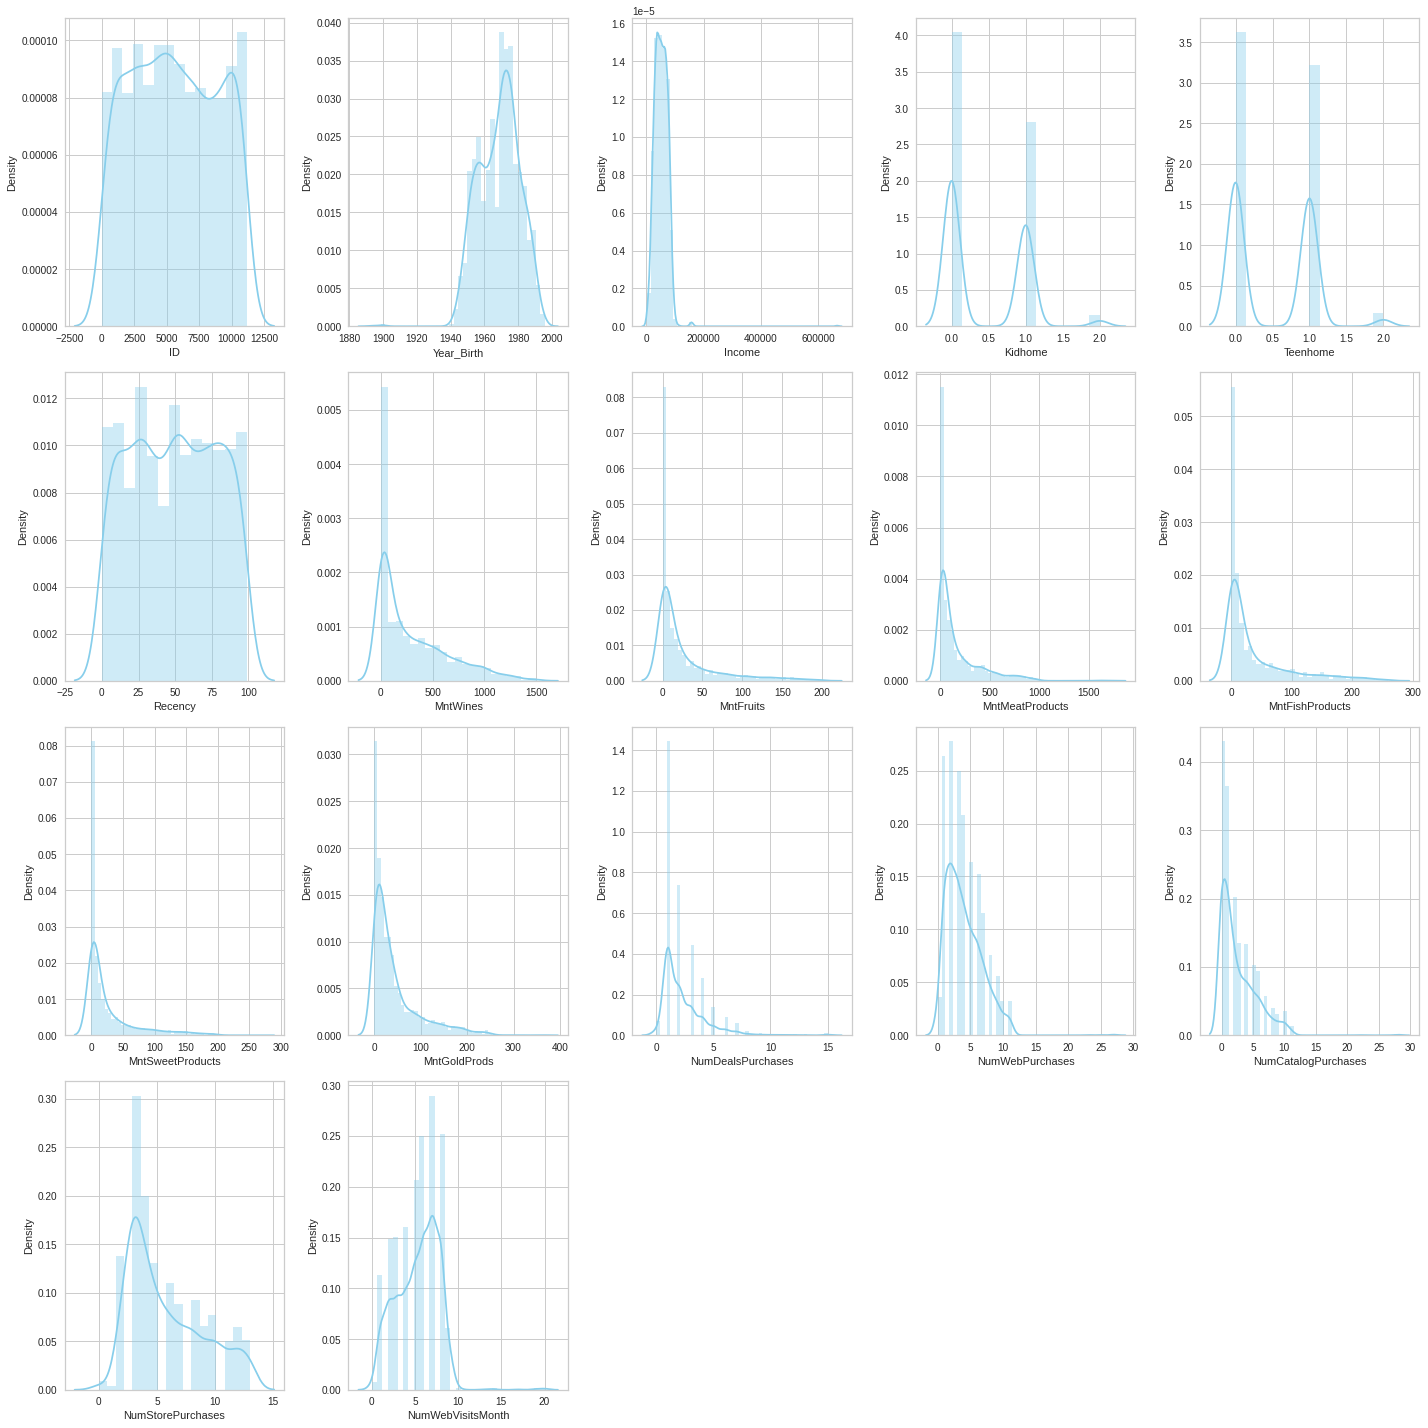

In [ ]:
plt.figure(figsize=(20,20))

numerical1 = ['ID', 'Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
        'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']

features = numerical1
for i in range(0, len(features)):
    plt.subplot(4, len(features)//4 + 1, i+1)
    #plt.subplot(1, len(features), i+1)
    sns.distplot(x=df_baru2[features[i]], color='skyblue')
    plt.xlabel(features[i])
    plt.tight_layout()

- Kebanyakan customer memiliki tahun kkelahiran antara 1970 - 1980
- Kebanyakan customer memiliki anak remaja daripada yang masih kecil

#### 4.2.2 Checking Outlier

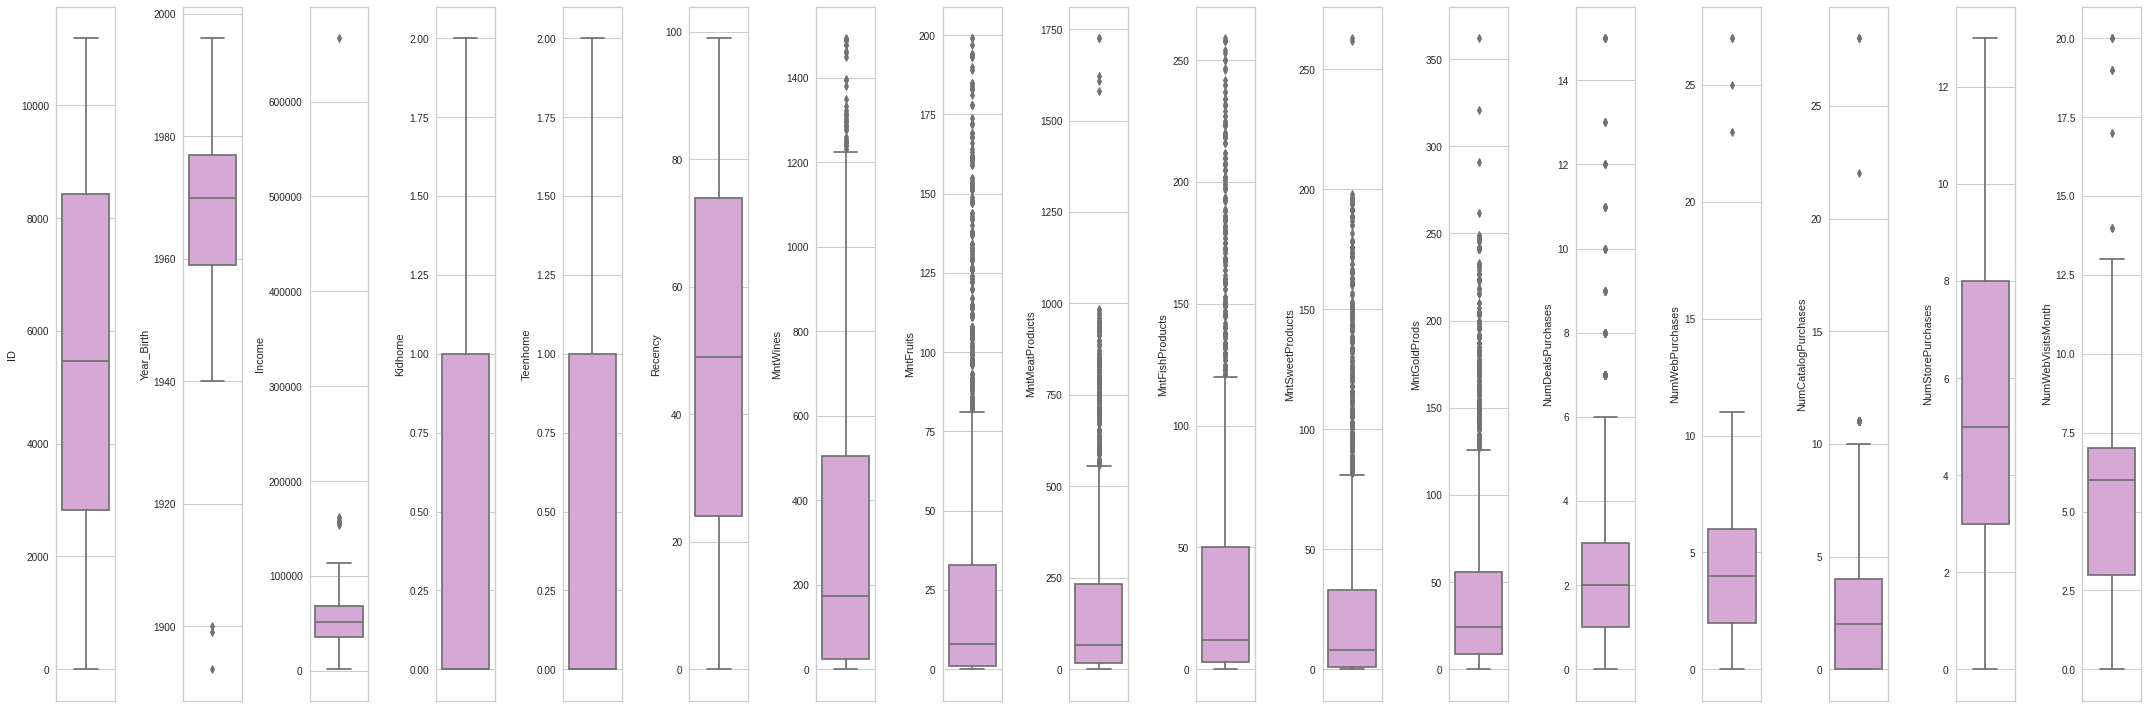

In [ ]:
# Checking outlier using BOXPLOT
plt.figure(figsize=(30,10))

# plotting
features = numerical1
for i in range(0, len(features)):
    plt.subplot(1, len(features), i+1)
    sns.boxplot(y=df_baru2[features[i]], color='plum')
    plt.tight_layout()

- Kolom `MntWines`, `MntFruits`, `MntMeatProducts`, `MntFishProducts`, `MntSweetProducts`, `MntGoldProds` memiliki outlier yang banyak
- Outlier tidak akan di drop semuanya melainkan hanya yang tidak memiliki relevansi terhadap analisa

### 4.3 Multivariate Analysis

#### 4.3.1 Heatmap Correlation

In [ ]:
corr = ['ID', 'Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
        'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Response' ]

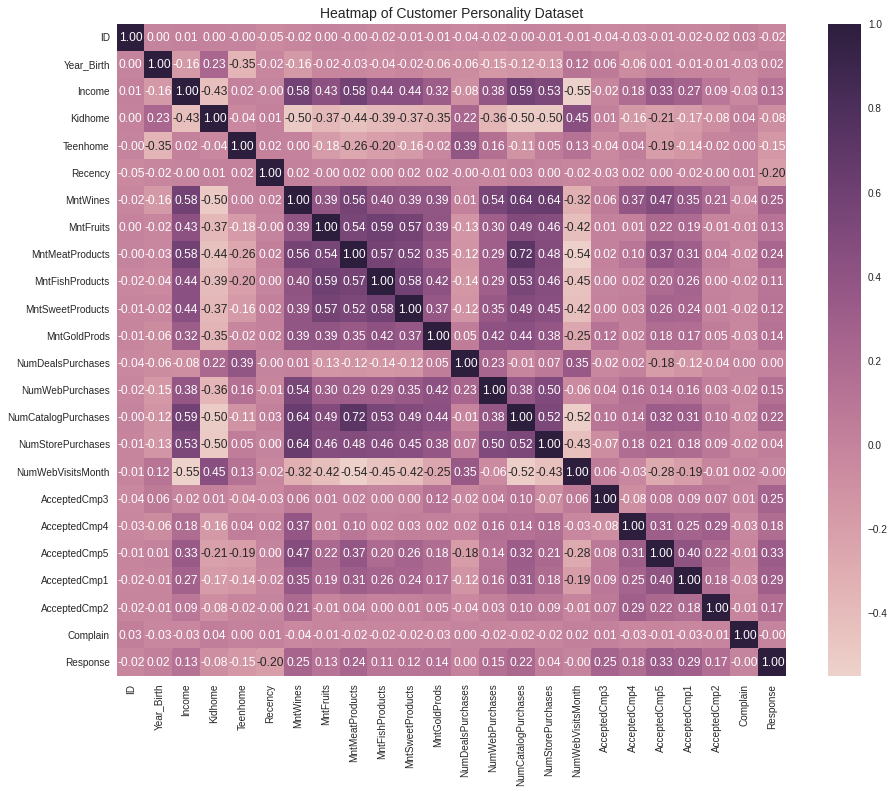

In [ ]:
correlation = df_baru2[corr].corr()
plt.figure(figsize=(15, 12))
colormap = sns.cubehelix_palette(as_cmap=True)
sns.heatmap(correlation, annot=True, fmt='.2f', cmap = colormap)
plt.title('Heatmap of Customer Personality Dataset', fontsize=14)
plt.show()

- Kolom `Z_CostContact` dan `Z_Revenue` tidak dilakukan analisa korelasi karena hanya memiliki 1 unique value
- Berdasarkan gambar diatas, tiap kolom tidak ada yang memiliki korelasi diatas 0.8 sehingga tidak ada yang perlu di drop

## 5. Data Transformation

In [ ]:
df_baru3 = df_baru.copy()

##### A. Change Marital Status Column

- Kolom `Marital_Status` akan diubah menjadi value yang isinya **Single** dan **Relationship**

In [ ]:
df_baru3['Marital_Status'].unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

In [ ]:
#Replace name for marital_status
marital_dict = {
    'Single' : 'Single',
    'Widow': 'Single',
    'Alone': 'Single',
    'Absurd' : 'Single',
    'YOLO' : 'Single',
    'Divorced' : 'Single',
    'Together' : 'Relationship',
    'Married' : 'Relationship'
}
df_baru3['Marital_Status'] = df_baru3['Marital_Status'].map(marital_dict)

##### B. Making Age Column

- Dikarenakan tahun terbesar pada data adalah 2014, maka akan digunakan current year pada tahun **2015**

In [ ]:
#Change column Year_Birth into Age
df_baru3['Age'] = 2015 - df_baru3['Year_Birth']

In [ ]:
df_baru3['Age'].value_counts()

39     89
44     87
40     83
43     79
37     77
45     77
42     74
50     74
46     71
41     69
59     55
57     53
36     53
63     52
38     52
47     51
56     51
49     50
61     50
60     49
55     49
33     45
52     45
48     44
53     44
58     43
64     43
32     42
29     42
51     42
35     39
34     39
31     38
54     36
62     35
30     32
26     30
66     30
65     29
27     29
28     27
67     21
25     18
69     16
68     16
24     15
23     13
70      8
72      7
71      7
22      5
20      5
21      3
19      2
116     1
74      1
122     1
115     1
75      1
Name: Age, dtype: int64

- Kolom Age masih terdapat nilai yang outlier sehingga perlu dihapus nilai age yang lebih dari 90 tahun

##### C. Change Education Column

- Kolom `Education` akan diubah valuenya menjadi **Postgraduate** dan **Undergraduate**

In [ ]:
df_baru3['Education'].value_counts()

Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: Education, dtype: int64

In [ ]:
#Replace name for Education
edu_dict = {
    'Graduation' : 'Postgraduate',
    'PhD': 'Postgraduate',
    'Master': 'Postgraduate',
    '2n Cycle' : 'Undergraduate',
    'Basic' : 'Undergraduate'
}
df_baru3['Education'] = df_baru3['Education'].map(edu_dict)

##### D. Making Children Column

- Akan dibuat kolom `Children` berupa jumlah total anak yang dimiliki customer ID

In [ ]:
#Joining column teenhome & kidhome
df_baru3['Children'] = df_baru3['Kidhome'] + df_baru3['Teenhome']

In [ ]:
df_baru3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2240 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

### 5.1 RFM Analysis

- Recency(R): Seberapa baru pelanggan melakukan pembelian.(Recency)
- Frequency(F): Seberapa sering customer melakukan pembelian.(NumPurchase)
- Monetary(M): Berapa total uang yang dikeluarkan customer saat berbelanja.(Mnt)

##### A. Making Column Expenditure (Monetary)

In [ ]:
#Make new column Expenditure
df_baru3['Expenditure'] = df_baru3['MntWines'] + df_baru3['MntFruits'] + df_baru3['MntMeatProducts'] + df_baru3['MntFishProducts'] + df_baru3['MntSweetProducts'] + df_baru3['MntGoldProds']

##### B. Making column Total Num Purchase (Frequency)

In [ ]:
#Make new column 'NumTotalPurchases'
df_baru3['TotalNumPurchase'] = df_baru3['NumWebPurchases'] + df_baru3['NumCatalogPurchases'] + df_baru3['NumStorePurchases'] + df_baru3['NumDealsPurchases']

In [ ]:
df_baru4 = df_baru3.copy()

### 5.2 Handling Outlier

- Akan di drop outlier untuk kolom `Income` yang nilainya lebih dari 600000
- Akan di drop outlier untuk kolom `Age` yang nilainya diatas umur 90 tahun
- Untuk kolom lain yang masih memiliki outlier tidak akan di drop karena kondisi outlier tidak terlalu extreme, dan masih memiliki informasi yang relevan serta penting

In [ ]:
#Dropping outlier from column age, income and savings
df_baru4 = df_baru4[(df_baru4['Age']<90)]
df_baru4 = df_baru4[(df_baru4['Income']<600000)]

In [ ]:
df_baru4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2236 entries, 0 to 2239
Data columns (total 33 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2236 non-null   int64  
 1   Year_Birth           2236 non-null   int64  
 2   Education            2236 non-null   object 
 3   Marital_Status       2236 non-null   object 
 4   Income               2236 non-null   float64
 5   Kidhome              2236 non-null   int64  
 6   Teenhome             2236 non-null   int64  
 7   Dt_Customer          2236 non-null   object 
 8   Recency              2236 non-null   int64  
 9   MntWines             2236 non-null   int64  
 10  MntFruits            2236 non-null   int64  
 11  MntMeatProducts      2236 non-null   int64  
 12  MntFishProducts      2236 non-null   int64  
 13  MntSweetProducts     2236 non-null   int64  
 14  MntGoldProds         2236 non-null   int64  
 15  NumDealsPurchases    2236 non-null   i

In [ ]:
#Rename column
df_baru4.rename(columns = {'MntWines':'Wines', 
                          'MntFruits':'Fruits',
                          'MntMeatProducts' : 'Meats',
                          'MntFishProducts' : 'Fish',
                          'MntSweetProducts' : 'Sweets',
                          'MntGoldProds' : 'Gold',
                          'NumDealsPurchases' : 'Deals Purchase',
                          'NumWebPurchases' : 'Web Purchase',
                          'NumCatalogPurchases' : 'Catalog Purchase',
                          'NumStorePurchases' : 'Store Purchase',
                          'NumWebVisitsMonth' : 'Web Visit',
                           'AcceptedCmp3' : 'Campaign 3',
                           'AcceptedCmp4' : 'Campaign 4',
                           'AcceptedCmp5' : 'Campaign 5',
                           'AcceptedCmp1' : 'Campaign 1',
                           'AcceptedCmp2' : 'Campaign 2',
                           'Response' : 'Campaign 6'}, inplace = True)

### 5.3 Visualization 2

#### A. Pengeluaran Customer

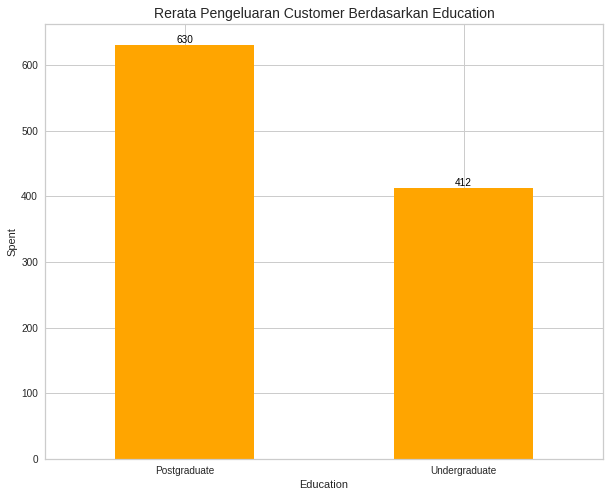

In [ ]:
ax = df_baru4[['Education','Expenditure']].groupby('Education').mean().plot(kind='bar', figsize=(10,8), legend = None, color = 'Orange')
plt.xticks(rotation=0)
plt.ylabel('Spent')
plt.title('Rerata Pengeluaran Customer Berdasarkan Education', fontsize=14)
for p in ax.patches:
  number = '{}'.format(p.get_height().astype('int64'))
  ax.annotate(number, (p.get_x() + p.get_width()/2., p.get_height()), ha='center', va='center',
              xytext=(0,5), textcoords='offset points', color='black', fontsize=10)

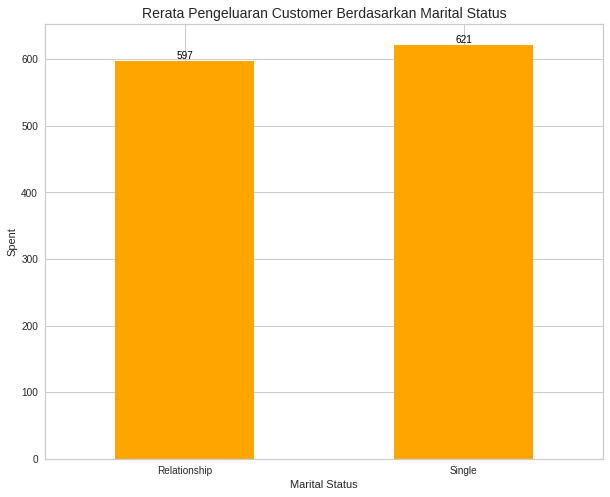

In [ ]:
ax = df_baru4[['Marital_Status','Expenditure']].groupby('Marital_Status').mean().plot(kind='bar', figsize=(10,8), legend = None, color = 'Orange')
plt.xticks(rotation=0)
plt.ylabel('Spent')
plt.xlabel('Marital Status')
plt.title('Rerata Pengeluaran Customer Berdasarkan Marital Status', fontsize=14)
for p in ax.patches:
  number = '{}'.format(p.get_height().astype('int64'))
  ax.annotate(number, (p.get_x() + p.get_width()/2., p.get_height()), ha='center', va='center',
              xytext=(0,5), textcoords='offset points', color='black', fontsize=10)

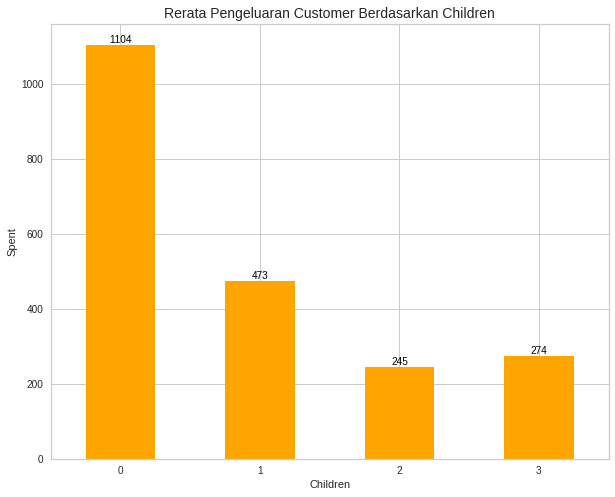

In [ ]:
ax = df_baru4[['Children','Expenditure']].groupby('Children').mean().plot(kind='bar', figsize=(10,8), legend = None, color = 'Orange')
plt.xticks(rotation=0)
plt.ylabel('Spent')
plt.xlabel('Children')
plt.title('Rerata Pengeluaran Customer Berdasarkan Children', fontsize=14)
for p in ax.patches:
  number = '{}'.format(p.get_height().astype('int64'))
  ax.annotate(number, (p.get_x() + p.get_width()/2., p.get_height()), ha='center', va='center',
              xytext=(0,5), textcoords='offset points', color='black', fontsize=10)

In [ ]:
age_arr = []
for x in df_baru4['Age']:
    if x <= 30:
        age_arr.append('<30')
    elif x <= 40 :
        age_arr.append('31-40')
    elif x <= 50 :
        age_arr.append('41-50')
    elif x <= 60 :
        age_arr.append('51-60')
    else:
        age_arr.append('>61')

df_baru4['age_arr'] = age_arr

In [ ]:
df_baru4['Age'].min()

19

In [ ]:
age_arr= ['<30', '31-40', '41-50', '51-60', '>61']
age_neww = (df_baru4.groupby('age_arr')['Expenditure'].mean()).loc[age_arr]

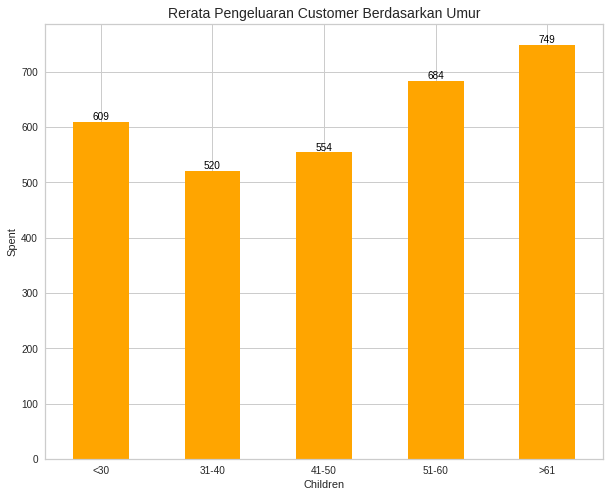

In [ ]:
ax = age_neww.plot(kind='bar', figsize=(10,8), legend = None, color = 'Orange')
plt.xticks(rotation=0)
plt.ylabel('Spent')
plt.xlabel('Children')
plt.title('Rerata Pengeluaran Customer Berdasarkan Umur', fontsize=14)
for p in ax.patches:
  number = '{}'.format(p.get_height().astype('int64'))
  ax.annotate(number, (p.get_x() + p.get_width()/2., p.get_height()), ha='center', va='center',
              xytext=(0,5), textcoords='offset points', color='black', fontsize=10)

Ada beberapa hal yang mempengaruhi rerata pengeluaran customer yaitu:
- Tingkat pendidikan, customer yang sudah lulus cenderung memiliki rerata pengeluaran yang lebih besar karena banyak yang memang sudah memiliki penghasilan sendiri
- Status Pernikahan, customer yang single memiliki rerata pengeluaran yang lebih besar dikarenakan tidak ada tanggungan seperti customer yang dalam relationship
- Jumlah anak, semakin sedikit anak rerata pengeluaran customer cenderung lebih besar
- Umur, pengeluaran tertinggi customer adalah yang berusia diatas umur 61 tahun

In [ ]:
df_baru4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2236 entries, 0 to 2239
Data columns (total 34 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                2236 non-null   int64  
 1   Year_Birth        2236 non-null   int64  
 2   Education         2236 non-null   object 
 3   Marital_Status    2236 non-null   object 
 4   Income            2236 non-null   float64
 5   Kidhome           2236 non-null   int64  
 6   Teenhome          2236 non-null   int64  
 7   Dt_Customer       2236 non-null   object 
 8   Recency           2236 non-null   int64  
 9   Wines             2236 non-null   int64  
 10  Fruits            2236 non-null   int64  
 11  Meats             2236 non-null   int64  
 12  Fish              2236 non-null   int64  
 13  Sweets            2236 non-null   int64  
 14  Gold              2236 non-null   int64  
 15  Deals Purchase    2236 non-null   int64  
 16  Web Purchase      2236 non-null   int64  


#### B. Menghitung Jumlah Customer berdasarkan Demografik Customer

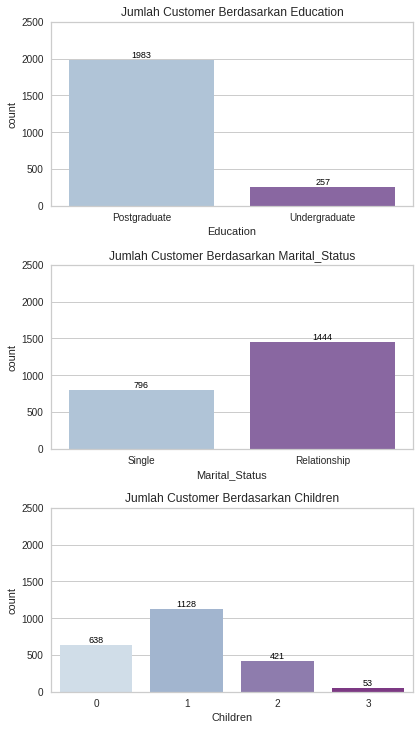

In [ ]:
plt.figure(figsize=(6,20))
categorical2 = ['Education', 'Marital_Status', 'Children']
features = categorical2

for i in range(0, len(features)):
    plt.subplot(6, len(features)//6 + 1, i+1)
    #plt.subplot(1, len(features), i+1)
    ax = sns.countplot(x = df_baru3[features[i]], data=df_baru3, palette = 'BuPu')
    ax.set_title(f'Jumlah Customer Berdasarkan {features[i]}',fontsize=12)

    for p in ax.patches:
      number = '{}'.format(p.get_height().astype('int64'))
      ax.annotate(number, (p.get_x() + p.get_width()/2., p.get_height()), ha='center', va='center',
      xytext=(0,5), textcoords='offset points', color='black', fontsize=9)
    plt.ylim(0,2500)
    plt.tight_layout()

- Customer dengan latar pendidikan postgraduate memiliki jumlah yang lebih banyak. Hal ini juga bisa menjadi faktor tingginya pengeluaran pada customer postgraduate
- Customer yang single cenderung lebih sedikit daripada yang relationship. Hal ini juga membuktikan bahwa jumlah customer tidak mempengaruhi pengeluaran karena pengeluaran customer single lebih besar daripada relationship
- Customer yang memiliki anak 1 memiliki jumlah yang lebih banyak daripada yang lain. 

#### C. Mengetahui Income Bulanan Customer

In [ ]:
from datetime import datetime

In [ ]:
df_baru4['year'] = pd.DatetimeIndex(df_baru4['Dt_Customer']).year
df_baru4['month'] = pd.DatetimeIndex(df_baru4['Dt_Customer']).month

In [ ]:
df_baru4['new_date'] = pd.to_datetime(df_baru4.year.astype(str) + '/' + df_baru4.month.astype(str) + '/01')
df_baru4.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,Wines,...,Z_Revenue,Campaign 6,Age,Children,Expenditure,TotalNumPurchase,age_arr,year,month,new_date
0,5524,1957,Postgraduate,Single,58138.0,0,0,04-09-2012,58,635,...,11,1,58,0,1617,25,51-60,2012,4,2012-04-01
1,2174,1954,Postgraduate,Single,46344.0,1,1,08-03-2014,38,11,...,11,0,61,2,27,6,>61,2014,8,2014-08-01
2,4141,1965,Postgraduate,Relationship,71613.0,0,0,21-08-2013,26,426,...,11,0,50,0,776,21,41-50,2013,8,2013-08-01
3,6182,1984,Postgraduate,Relationship,26646.0,1,0,10-02-2014,26,11,...,11,0,31,1,53,8,31-40,2014,10,2014-10-01
4,5324,1981,Postgraduate,Relationship,58293.0,1,0,19-01-2014,94,173,...,11,0,34,1,422,19,31-40,2014,1,2014-01-01


Text(0.5, 1.0, 'Income Bulanan')

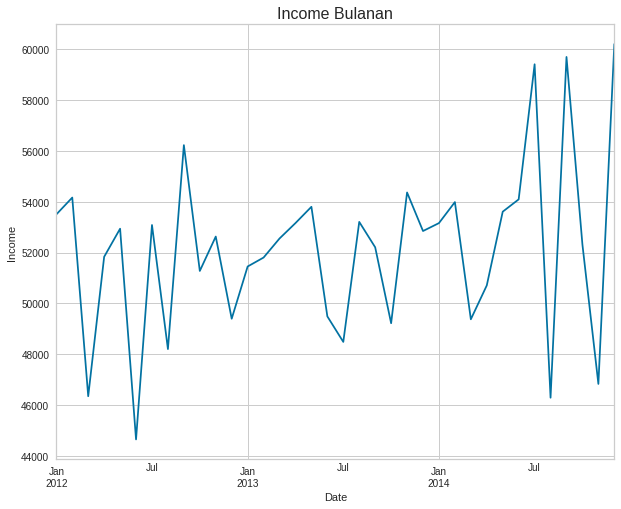

In [ ]:
df_baru4.groupby(['new_date'])['Income'].mean().plot(figsize=(10,8))
plt.ylabel('Income')
plt.xlabel('Date')
plt.title('Income Bulanan', fontsize = 16 )

- Rerata income tertinggi dari customer adalah pada bulan Juli, September dan oktober tahun 2014


Text(0.5, 1.0, 'Pengeluaran Bulanan')

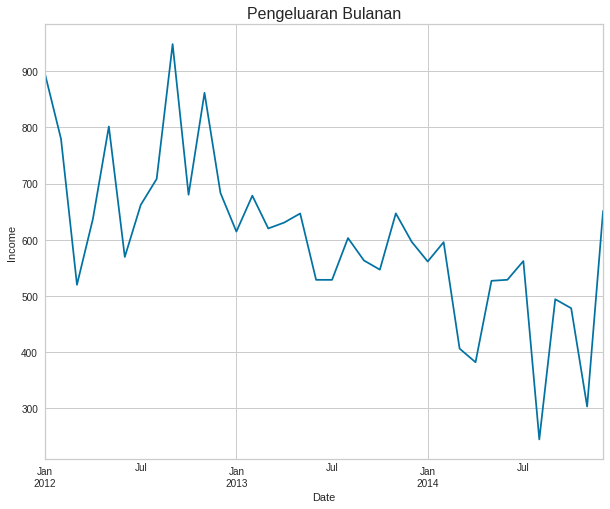

In [ ]:
df_baru4.groupby(['new_date'])['Expenditure'].mean().plot(figsize=(10,8))
plt.ylabel('Income')
plt.xlabel('Date')
plt.title('Pengeluaran Bulanan', fontsize = 16 )

- Rerata pengeluaran tertinggi dari customer adalah pada bulan Januari, dan bulan aagustus tahun 2014 

#### D. Mengetahui Kategori Produk dengan Pemasukan Tertinggi

Text(0.5, 1.0, 'Total Spend tiap Product')

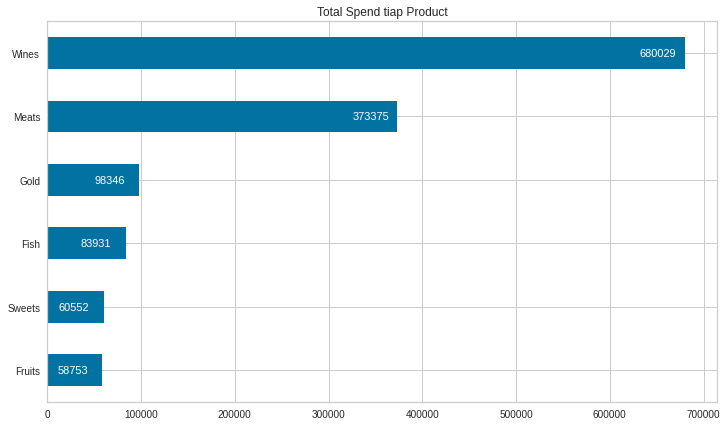

In [ ]:
plt.figure(figsize=(12,7))
ax = df_baru4[['Wines', 'Fruits', 'Meats', 'Fish', 'Sweets', 'Gold']].sum().sort_values(ascending=True).plot(kind='barh')
for p in ax.patches:
      number = '{}'.format(p.get_width().astype('int64'))
      ax.annotate(number, (p.get_width(), p.get_y() + p.get_height()/2), ha='left', va='center',
      xytext=(-45,0), textcoords='offset points', color='white', fontsize=11)
ax.set_title('Total Spend tiap Product',fontsize=12)

- Kategori wines merupakan produk dengan pemasukan terbanyak

#### E. Mengetahui Platform apa yang Banyak Digunakan Customer untuk Pembelian

Text(0.5, 1.0, 'Jumlah Pembelian di Tiap Tempat')

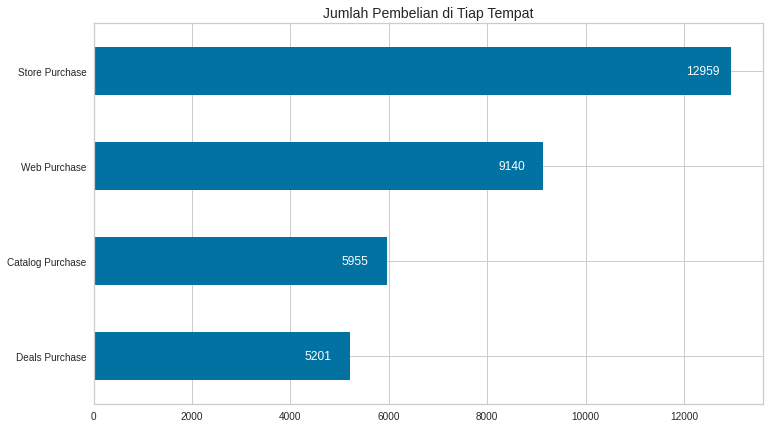

In [ ]:
plt.figure(figsize=(12,7))
ax = df_baru4[['Deals Purchase', 'Web Purchase', 'Catalog Purchase', 'Store Purchase']].sum().sort_values(ascending=True).plot(kind='barh')
for p in ax.patches:
      number = '{}'.format(p.get_width().astype('int64'))
      ax.annotate(number, (p.get_width(), p.get_y() + p.get_height()/2), ha='left', va='center',
      xytext=(-45,0), textcoords='offset points', color='white', fontsize=12)
ax.set_title('Jumlah Pembelian di Tiap Tempat',fontsize=14)

## 6. Data Preprocessing

In [ ]:
df_new1 = df_baru4.copy()

In [ ]:
df_new1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2236 entries, 0 to 2239
Data columns (total 37 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   ID                2236 non-null   int64         
 1   Year_Birth        2236 non-null   int64         
 2   Education         2236 non-null   object        
 3   Marital_Status    2236 non-null   object        
 4   Income            2236 non-null   float64       
 5   Kidhome           2236 non-null   int64         
 6   Teenhome          2236 non-null   int64         
 7   Dt_Customer       2236 non-null   object        
 8   Recency           2236 non-null   int64         
 9   Wines             2236 non-null   int64         
 10  Fruits            2236 non-null   int64         
 11  Meats             2236 non-null   int64         
 12  Fish              2236 non-null   int64         
 13  Sweets            2236 non-null   int64         
 14  Gold              2236 n

In [ ]:
drop = ['Year_Birth', 'Kidhome', 'Teenhome', 'Education', 'Marital_Status', 'Income', 'Dt_Customer', 'Wines', 'Fruits', 'Meats', 'Fish', 'Sweets', 'Gold',
        'Deals Purchase', 'Web Purchase', 'Catalog Purchase', 'Store Purchase', 'Web Visit', 'Campaign 3', 'Campaign 4', 'Campaign 5', 'Campaign 1',
        'Campaign 2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Campaign 6', 'Age', 'Children', 'age_arr', 'year', 'month', 'new_date']

df_new1.drop(drop, axis=1, inplace=True)

In [ ]:
df_new1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2236 entries, 0 to 2239
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   ID                2236 non-null   int64
 1   Recency           2236 non-null   int64
 2   Expenditure       2236 non-null   int64
 3   TotalNumPurchase  2236 non-null   int64
dtypes: int64(4)
memory usage: 87.3 KB


In [ ]:
df_new2 = df_new1.copy()

In [ ]:
df_new2.drop('ID', axis=1, inplace=True)

In [ ]:
df_new2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2236 entries, 0 to 2239
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Recency           2236 non-null   int64
 1   Expenditure       2236 non-null   int64
 2   TotalNumPurchase  2236 non-null   int64
dtypes: int64(3)
memory usage: 69.9 KB


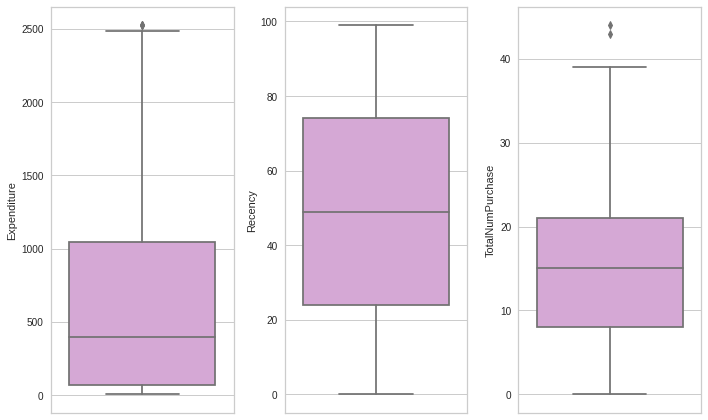

In [ ]:
# Checking outlier again
plt.figure(figsize=(10,6))

numerical1 = ['Expenditure', 'Recency', 'TotalNumPurchase']
# plotting
features = numerical1
for i in range(0, len(features)):
    plt.subplot(1, len(features), i+1)
    sns.boxplot(y=df_new2[features[i]], color='plum')
    plt.tight_layout()

- Pada kolom yang akan digunakan analysis tidak ada kolom yang memiliki outlier terlalu extreme sehingga tidak ada yang akan di drop
- Karena data sudah numerik semua maka tidak perlu dilakukan encoding

In [ ]:
df_new2.rename(columns = {'Expenditure':'Monetary', 'TotalNumPurchase':'Frequency'}, inplace = True)

### 6.1 Scalling

In [ ]:
df_new4 = df_new2.copy()

In [ ]:
feature = ['Monetary', 'Recency', 'Frequency']
X = df_new2[feature].values

X_std = MinMaxScaler().fit_transform(X)
df_std4 = pd.DataFrame(data = X_std, columns = feature)
df_std4.describe()

,Monetary,Recency,Frequency
count,2236.000000,2236.000000,2236.000000
mean,0.238487,0.496124,0.338012
std,0.238835,0.292498,0.174497
min,0.000000,0.000000,0.000000
25%,0.025397,0.242424,0.181818
50%,0.155357,0.494949,0.340909
75%,0.412897,0.747475,0.477273
max,1.000000,1.000000,1.000000


## 7. Unsupervised Machine Learning

### 7.1 Elbow Method

In [ ]:
inertia4 = []

for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(df_std4.values)
    nilai_inertia = kmeans.inertia_
    print('cluster: ', i, 'nilai inertia: ', nilai_inertia)
    inertia4.append(kmeans.inertia_)

cluster:  2 nilai inertia:  243.5315364814016
cluster:  3 nilai inertia:  155.2458118093286
cluster:  4 nilai inertia:  105.95045342119164
cluster:  5 nilai inertia:  89.64595771434801
cluster:  6 nilai inertia:  76.93670740310168
cluster:  7 nilai inertia:  66.15590492916891
cluster:  8 nilai inertia:  58.25495520038225
cluster:  9 nilai inertia:  52.95668143642857
cluster:  10 nilai inertia:  48.62569407708202


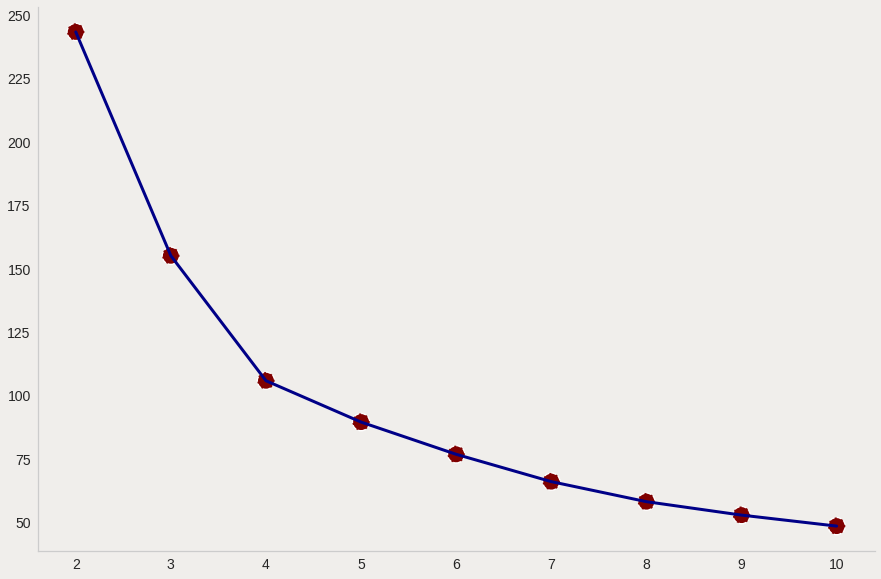

In [ ]:
plt.figure(figsize=(15, 10), facecolor='#f0eeeb')

ax = sns.lineplot(x=range(2, 11), y=inertia4, color='#000087', linewidth = 3)
ax = sns.scatterplot(x=range(2, 11), y=inertia4, s=300, color='#800000',  linestyle='--')
ax.grid(False)
ax.set_facecolor('#f0eeeb')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
# Only show ticks on the left and bottom spines
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
ax.xaxis.label.set_color('black')
ax.yaxis.label.set_color('black')
ax.tick_params(axis='both', labelsize=14)


In [ ]:
df_std4

,Monetary,Recency,Frequency
0,0.639683,0.585859,0.568182
1,0.008730,0.383838,0.136364
2,0.305952,0.262626,0.477273
3,0.019048,0.262626,0.181818
4,0.165476,0.949495,0.431818
...,...,...,...
2231,0.530159,0.464646,0.409091
2232,0.174206,0.565657,0.500000
2233,0.490476,0.919192,0.431818
2234,0.332540,0.080808,0.522727


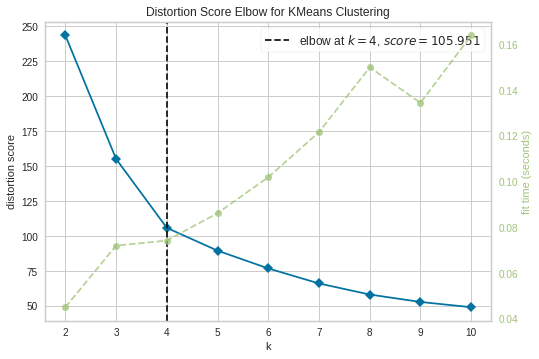

In [ ]:
elbow = KElbowVisualizer(KMeans(), k=10)
elbow.fit(df_std4[['Monetary', 'Recency', 'Frequency']])
elbow.show()

- Didapatkan nilai n cluster pada elbow method adalah 4

### 7.2 Silhouette Score

In [ ]:
range_n_clusters = list(range(2,11))
print(range_n_clusters)

[2, 3, 4, 5, 6, 7, 8, 9, 10]


In [ ]:
arr_silhouette_score_euclidean4 = []
for i in range_n_clusters:
    kmeans = KMeans(n_clusters=i).fit(df_std4)
    preds4 = kmeans.predict(df_std4)
     
    score_euclidean4 = silhouette_score(df_std4, preds4, metric='euclidean')
    arr_silhouette_score_euclidean4.append(score_euclidean4)
    print('cluster: ', i, 'nilai euclidean: ', score_euclidean4)

cluster:  2 nilai euclidean:  0.3464212956861749
cluster:  3 nilai euclidean:  0.3803361393585216
cluster:  4 nilai euclidean:  0.4032460893770847
cluster:  5 nilai euclidean:  0.37175765070191913
cluster:  6 nilai euclidean:  0.3644029062240441
cluster:  7 nilai euclidean:  0.36050464000680293
cluster:  8 nilai euclidean:  0.3654689978257193
cluster:  9 nilai euclidean:  0.3688064870725867
cluster:  10 nilai euclidean:  0.3627825589824367


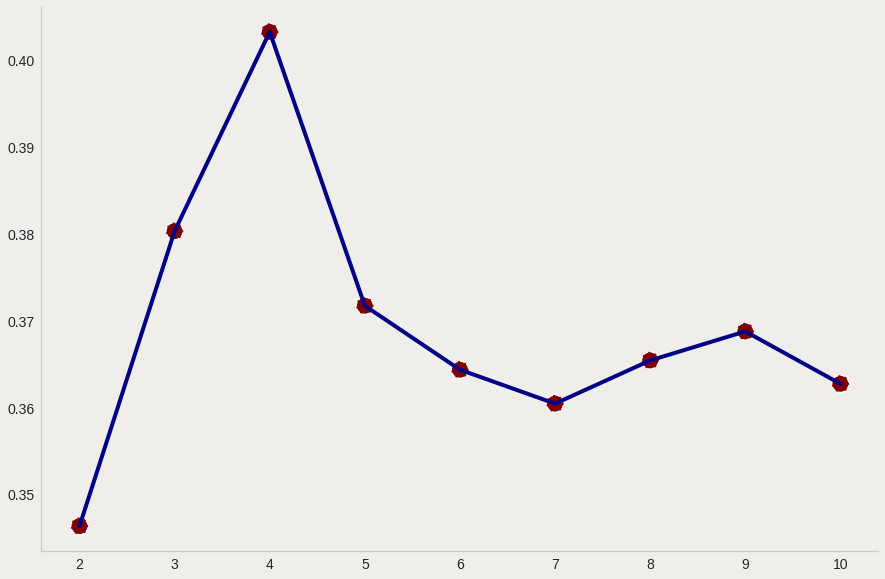

In [ ]:
fig, ax = plt.subplots(figsize=(15, 10), facecolor='#f0eeeb')
ax = sns.lineplot(x=range(2,11), y=arr_silhouette_score_euclidean4, color='#000087', linewidth = 4)
ax = sns.scatterplot(x=range(2,11), y=arr_silhouette_score_euclidean4, s=300, color='#800000',  linestyle='--')
ax.grid(False)
ax.set_facecolor('#f0eeeb')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
# Only show ticks on the left and bottom spines
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
ax.xaxis.label.set_color('black')
ax.yaxis.label.set_color('black')
ax.tick_params(axis='both', labelsize=14)

- Didapatkan nilai n cluster dengan sillhoute score dan elbow method memiliki hasil yang ssama yaitu 4 sehingga akan digunakan clustering sebanyak 4 kategori

In [ ]:
kmeans = KMeans(n_clusters=4, random_state=0)
kmeans.fit(df_std4.values)

KMeans(n_clusters=4, random_state=0)

In [ ]:
df_std4['cluster'] = kmeans.labels_
df_std4

,Monetary,Recency,Frequency,cluster
0,0.639683,0.585859,0.568182,2
1,0.008730,0.383838,0.136364,0
2,0.305952,0.262626,0.477273,3
3,0.019048,0.262626,0.181818,0
4,0.165476,0.949495,0.431818,1
...,...,...,...,...
2231,0.530159,0.464646,0.409091,3
2232,0.174206,0.565657,0.500000,2
2233,0.490476,0.919192,0.431818,2
2234,0.332540,0.080808,0.522727,3


In [ ]:
df_new1['cluster'] = kmeans.labels_
df_new1

,ID,Recency,Expenditure,TotalNumPurchase,cluster
0,5524,58,1617,25,2
1,2174,38,27,6,0
2,4141,26,776,21,3
3,6182,26,53,8,0
4,5324,94,422,19,1
...,...,...,...,...,...
2235,10870,46,1341,18,3
2236,4001,56,444,22,2
2237,7270,91,1241,19,2
2238,8235,8,843,23,3


In [ ]:
df_new2 = df_new1.copy()

In [ ]:
from matplotlib.colors import ListedColormap
from matplotlib import colors
cmap = colors.ListedColormap(["#001253", "#3E6D9C", "#FD841f", "#E14D2A"])

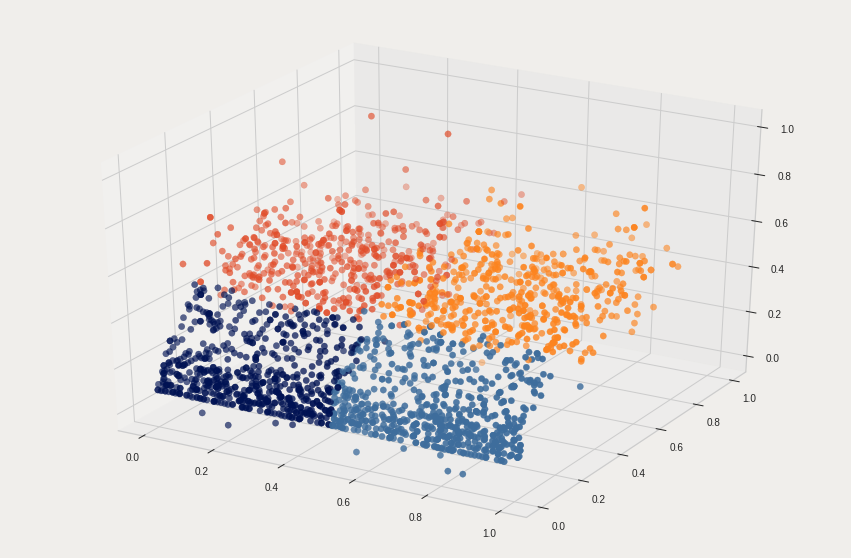

In [ ]:
x = df_std4['Recency']
y = df_std4['Monetary']
z = df_std4['Frequency']
fig = plt.figure(figsize=(15,10), facecolor='#f0eeeb')
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(x,y,z, s=40, c=df_std4['cluster'], marker='o', cmap = cmap, label = 'cluster')
ax.set_facecolor('#f0eeeb')
plt.show()

In [ ]:
df_new4['cluster'] = kmeans.labels_
df_new4

,Recency,Monetary,Frequency,cluster
0,58,1617,25,2
1,38,27,6,0
2,26,776,21,3
3,26,53,8,0
4,94,422,19,1
...,...,...,...,...
2235,46,1341,18,3
2236,56,444,22,2
2237,91,1241,19,2
2238,8,843,23,3


In [ ]:
df_baru4['cluster'] = kmeans.labels_
df_baru4

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,Wines,...,Campaign 6,Age,Children,Expenditure,TotalNumPurchase,age_arr,year,month,new_date,cluster
0,5524,1957,Postgraduate,Single,58138.0,0,0,04-09-2012,58,635,...,1,58,0,1617,25,51-60,2012,4,2012-04-01,2
1,2174,1954,Postgraduate,Single,46344.0,1,1,08-03-2014,38,11,...,0,61,2,27,6,>61,2014,8,2014-08-01,0
2,4141,1965,Postgraduate,Relationship,71613.0,0,0,21-08-2013,26,426,...,0,50,0,776,21,41-50,2013,8,2013-08-01,3
3,6182,1984,Postgraduate,Relationship,26646.0,1,0,10-02-2014,26,11,...,0,31,1,53,8,31-40,2014,10,2014-10-01,0
4,5324,1981,Postgraduate,Relationship,58293.0,1,0,19-01-2014,94,173,...,0,34,1,422,19,31-40,2014,1,2014-01-01,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Postgraduate,Relationship,61223.0,0,1,13-06-2013,46,709,...,0,48,1,1341,18,41-50,2013,6,2013-06-01,3
2236,4001,1946,Postgraduate,Relationship,64014.0,2,1,10-06-2014,56,406,...,0,69,3,444,22,>61,2014,10,2014-10-01,2
2237,7270,1981,Postgraduate,Single,56981.0,0,0,25-01-2014,91,908,...,0,34,0,1241,19,31-40,2014,1,2014-01-01,2
2238,8235,1956,Postgraduate,Relationship,69245.0,0,1,24-01-2014,8,428,...,0,59,1,843,23,51-60,2014,1,2014-01-01,3


In [ ]:
df_new4.groupby('cluster')[['Recency','Frequency','Monetary']].agg('mean')

,Recency,Frequency,Monetary
cluster,,,
0,23.301435,9.417863,158.105263
1,73.642302,9.541213,154.493002
2,73.341270,21.680556,1201.363095
3,23.588745,22.268398,1192.701299


- Cluster 0 = Low recency, low frequency, low monetary. Ada sebanyak 627 (28%) customer merupakan customer cluster 0. Cluster 0 ini kemungkinan adalah customer baru dengan jarak waktu transaksi tidak lama dan total transaksi kecil **(Potential Loyalist)**
- Cluster 1 = High recency, low frequency, low monetary. Ada sebanyak 643 (28,8%) customer merupakan customer cluster 1. Cluster 1 merupakan customer yang memungkinkan untuk churn dikarenakan masa aktif customer yang terlalu lama dengan total transaksi yang kecil pula **(Hibernating)**
- Cluster 2 = High recency, High frequency, High monetary. Ada sebanyak 504 (22,5%) customer merupakan customer cluster 2. Cluster 2 memiliki total transaksi yang besar dan memberikan pemasukan yang besar pula bagi perusahaan, tetapi masa aktif transaksi yang dilakukan sudah sangat lama dan berpotensi untuk churn. **(About to Sleep)**
- Cluster 3 = Low recency, High frequency, High monetary. Ada sebanyak 462 (20,7%) customer merupakan customer cluster 3. Cluster 3 ini merupakan cluster yang paling diinginkan oleh perusahaan karena mereka selalu memberikan pemasukan ttinggi dan sering dengan masa aktif transaksi yang dilakukan juga tidak lama. **(Best Customer)**

### 7.3 Menggunakan PCA

In [ ]:
pca = PCA(n_components=2)

pca.fit(df_std4)
pcs = pca.transform(df_std4)

data_pca = pd.DataFrame(data = pcs, columns = ['PC 1', 'PC 2'])

In [ ]:
data_pca['cluster'] = df_new4['cluster']
data_pca

,PC 1,PC 2,cluster
0,0.723244,-0.059630,2.0
1,-1.393431,0.085074,0.0
2,1.630542,0.253175,3.0
3,-1.388700,0.208209,0.0
4,-0.343692,-0.454852,1.0
...,...,...,...
2231,1.663609,0.058286,2.0
2232,0.637721,-0.061376,1.0
2233,0.688863,-0.403705,NaN
2234,1.636857,0.437497,1.0


In [ ]:
data_pca.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2236 entries, 0 to 2235
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   PC 1     2236 non-null   float64
 1   PC 2     2236 non-null   float64
 2   cluster  2232 non-null   float64
dtypes: float64(3)
memory usage: 52.5 KB


- Drop null values

In [ ]:
data_pca[data_pca['cluster'].isnull()]

,PC 1,PC 2,cluster
192,-0.394566,-0.459505,NaN
239,0.666819,-0.470577,NaN
339,0.682762,-0.141627,NaN
2233,0.688863,-0.403705,NaN


In [ ]:
data_pca = data_pca[data_pca['cluster'].notna()].reset_index(drop = True)

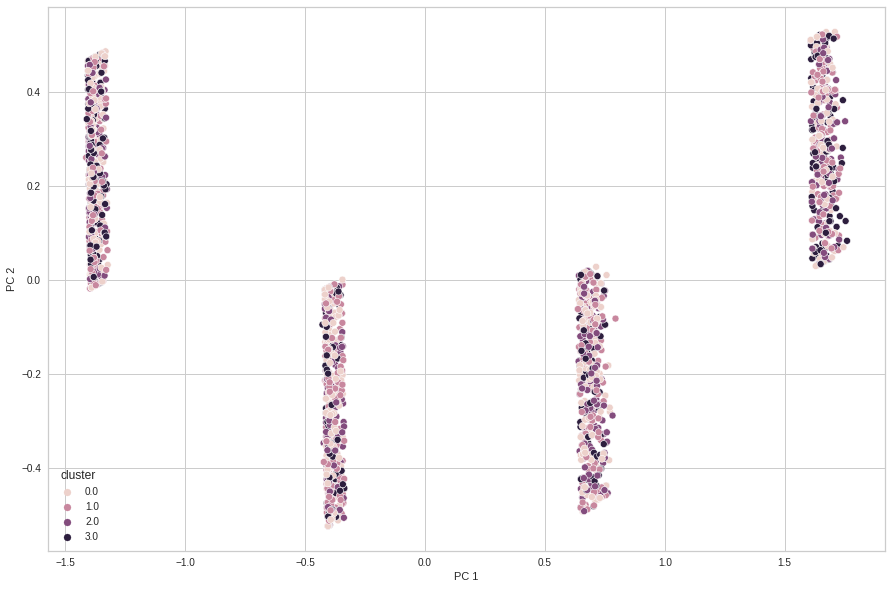

In [ ]:
fig, ax = plt.subplots(figsize=(15,10))
sns.scatterplot(data=data_pca, x='PC 1', y='PC 2', hue = 'cluster')

### 7.4 Visualization

In [ ]:
df_new2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2236 entries, 0 to 2239
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   ID                2236 non-null   int64
 1   Recency           2236 non-null   int64
 2   Expenditure       2236 non-null   int64
 3   TotalNumPurchase  2236 non-null   int64
 4   cluster           2236 non-null   int32
dtypes: int32(1), int64(4)
memory usage: 160.6 KB


In [ ]:
#Replace name for marital_status
cluster_dict = {
    0 : 'Potential Loyalist',
    1 : 'Hibernating',
    2 : 'About to Sleep',
    3 : 'Best Customer',
    'YOLO' : 'Single',
    'Divorced' : 'Single',
    'Together' : 'Relationship',
    'Married' : 'Relationship'
}
df_baru4['Cluster'] = df_baru4['cluster'].map(cluster_dict)

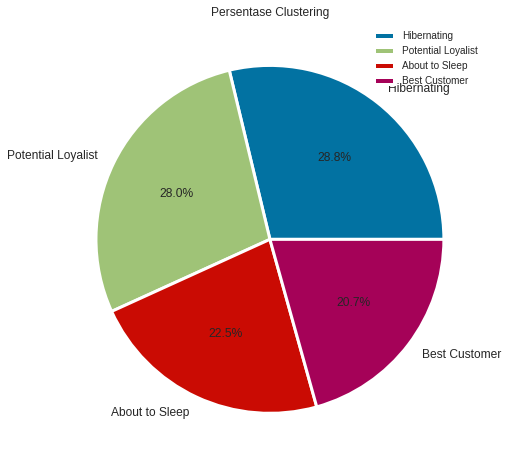

In [ ]:
#Persentase clustering
plt.figure(figsize=(15,8))
plt.pie(df_baru4['Cluster'].value_counts(),labels=df_baru4['Cluster'].value_counts().index,
       autopct='%1.1f%%',textprops={'fontsize':12}, wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'white' })
plt.title('Persentase Clustering')
plt.legend()

In [ ]:
df_new4['cluster'].value_counts()

1    643
0    627
2    504
3    462
Name: cluster, dtype: int64

#### 7.4.1 Income Vs Expenditure

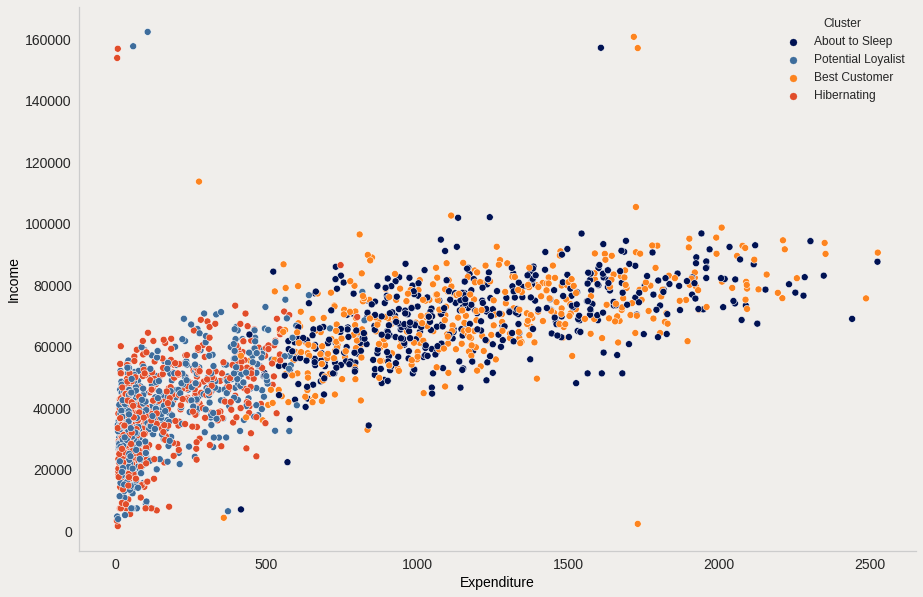

In [ ]:
fig, ax = plt.subplots(figsize =(15, 10), facecolor='#f0eeeb')

ax = sns.scatterplot(data = df_baru4, x = 'Expenditure', y = 'Income', hue = 'Cluster', palette = ["#001253", "#3E6D9C", "#FD841f", "#E14D2A"], alpha=1)
ax.grid(False)
ax.set_facecolor('#f0eeeb')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
# Only show ticks on the left and bottom spines
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
ax.xaxis.label.set_color('black')
ax.yaxis.label.set_color('black')
ax.tick_params(axis='both', labelsize=14)
plt.ylabel('Income', fontsize = 14)
plt.xlabel('Expenditure', fontsize = 14)
plt.legend(title = 'Cluster', fontsize = 12)

- Customer cluster 0 dan cluster 1 memiliki income antara 0 - 60.000 dengan expenditure sebesar 0-500. Dikarenakan income yang kecil maka pengeluaran yang dilakukan relatif kecil pula 
- Customer cluster 2 dan 3 memilliki income antara 40.000 - 90.000 dengan expenditurre sebesar 500-2500. Dikarenakan income yang besar maka pengeluaran yang dilakukan relatif besar pula 

#### 7.4.2 Performance Campaign

In [ ]:
campaign = df_baru4[['Campaign 1','Campaign 2','Campaign 3','Campaign 4','Campaign 5','Campaign 6','cluster']]
campaign.head()

,Campaign 1,Campaign 2,Campaign 3,Campaign 4,Campaign 5,Campaign 6,cluster
0,0,0,0,0,0,1,2
1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,3
3,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1


In [ ]:
camp_0 = pd.melt(campaign[campaign.cluster==0][['Campaign 1','Campaign 2','Campaign 3','Campaign 4','Campaign 5', 'Campaign 6']])
camp_1 = pd.melt(campaign[campaign.cluster==1][['Campaign 1','Campaign 2','Campaign 3','Campaign 4','Campaign 5', 'Campaign 6']])
camp_2 = pd.melt(campaign[campaign.cluster==2][['Campaign 1','Campaign 2','Campaign 3','Campaign 4','Campaign 5', 'Campaign 6']])
camp_3 = pd.melt(campaign[campaign.cluster==3][['Campaign 1','Campaign 2','Campaign 3','Campaign 4','Campaign 5', 'Campaign 6']])

In [ ]:
fig = make_subplots(rows=2, cols=2,subplot_titles=('Performa Campaign pada Potential Loyalist', 'Performa Campaign pada Hibernating', 'Performa Campaign pada About to Sleep','Performa Campaign pada Best Customer'),shared_yaxes=True, vertical_spacing=0.3)
fig.add_trace(go.Histogram(histfunc='sum',x=camp_0['variable'],y=camp_0['value'], marker_color='Orange',texttemplate='%{y}'),row=1,col=1)
fig.add_trace(go.Histogram(histfunc='sum',x=camp_1['variable'],y=camp_1['value'], marker_color='Lightcoral',texttemplate='%{y}'),row=1,col=2)
fig.add_trace(go.Histogram(histfunc='sum',x=camp_2['variable'],y=camp_2['value'], marker_color='thistle',texttemplate='%{y}'),row=2,col=1)
fig.add_trace(go.Histogram(histfunc='sum',x=camp_3['variable'],y=camp_3['value'], marker_color='lightsalmon',texttemplate='%{y}'),row=2,col=2)
fig.update_layout(showlegend=False, template='plotly_white', yaxis_range=[0,150], yaxis3_range=[0,150],height=800, 
    width=1000)

- Customer potential loyalist banyak yang cenderung menerima penawaran dari jenis campaign 6 
- Customer hibernatting cenderung menerima penawaran dari jenis campaign 3
- Customer about to sleep cenderung menerima penawaran dari jenis campaign 5
- Customer best customer cenderung menerima penawaran dari jenis campaign 6
- Secara keseluruhan banyak dari customer menerima penawaran dari campaign 6 dan  kurang suka dengan penawaran campaign 2


#### 7.4.3 Performance Platform

In [ ]:
platform = df_baru4[['Web Purchase','Catalog Purchase','Store Purchase', 'cluster']]
platform.head()

,Web Purchase,Catalog Purchase,Store Purchase,cluster
0,8,10,4,2
1,1,1,2,0
2,8,2,10,3
3,2,0,4,0
4,5,3,6,1


In [ ]:
plat_0 = pd.melt(platform[platform.cluster==0][['Web Purchase','Catalog Purchase','Store Purchase']])
plat_1 = pd.melt(platform[platform.cluster==1][['Web Purchase','Catalog Purchase','Store Purchase']])
plat_2 = pd.melt(platform[platform.cluster==2][['Web Purchase','Catalog Purchase','Store Purchase']])
plat_3 = pd.melt(platform[platform.cluster==3][['Web Purchase','Catalog Purchase','Store Purchase']])

In [ ]:
fig = make_subplots(rows=2, cols=2,subplot_titles=('Performa Platform pada Potential Loyalist', 'Performa Platform pada Hibernating', 'Performa Platform pada About to Sleep','Performa Platform pada Best Customer'),shared_yaxes=True, vertical_spacing=0.3)
fig.add_trace(go.Histogram(histfunc='sum',x=plat_0['variable'],y=plat_0['value'], marker_color='Orange',texttemplate='%{y}'),row=1,col=1)
fig.add_trace(go.Histogram(histfunc='sum',x=plat_1['variable'],y=plat_1['value'], marker_color='Lightcoral',texttemplate='%{y}'),row=1,col=2)
fig.add_trace(go.Histogram(histfunc='sum',x=plat_2['variable'],y=plat_2['value'], marker_color='thistle',texttemplate='%{y}'),row=2,col=1)
fig.add_trace(go.Histogram(histfunc='sum',x=plat_3['variable'],y=plat_3['value'], marker_color='lightsalmon',texttemplate='%{y}'),row=2,col=2)
fig.update_layout(showlegend=False, template='plotly_white', yaxis_range=[0,5000], yaxis3_range=[0,5000],height=800, 
    width=1000)

- Secara keseluruhan dari semua kategori customer cenderung untuk memilih berbelanja dengan datang ke store langsung dan melalui web

##### 7.4.3.1 Visualization 1 Frame

In [ ]:
purchase0 = (plat_0
          .groupby('variable')
          .agg(cluster_0=('value','sum'))
          .reset_index()
          .sort_values('cluster_0',ascending=False)
         )
purchase0

,variable,cluster_0
1,Store Purchase,2368
2,Web Purchase,1671
0,Catalog Purchase,503


In [ ]:
purchase1 = (plat_1
          .groupby('variable')
          .agg(cluster_1=('value','sum'))
          .reset_index()
          .sort_values('cluster_1',ascending=False)
         )
purchase1

,variable,cluster_1
1,Store Purchase,2395
2,Web Purchase,1707
0,Catalog Purchase,528


In [ ]:
purchase2 = (plat_2
          .groupby('variable')
          .agg(cluster_2=('value','sum'))
          .reset_index()
          .sort_values('cluster_2',ascending=False)
         )
purchase2

,variable,cluster_2
1,Store Purchase,4232
2,Web Purchase,2924
0,Catalog Purchase,2599


In [ ]:
purchase3 = (plat_3
          .groupby('variable')
          .agg(cluster_3=('value','sum'))
          .reset_index()
          .sort_values('cluster_3',ascending=False)
         )
purchase3

,variable,cluster_3
1,Store Purchase,3964
2,Web Purchase,2838
0,Catalog Purchase,2325


In [ ]:
from functools import reduce
dfbaru =[purchase0, purchase1, purchase2, purchase3]
df_merged = reduce(lambda  left,right: pd.merge(left,right,on=['variable'],
                                            how='outer'), dfbaru)
df_merged

,variable,cluster_0,cluster_1,cluster_2,cluster_3
0,Store Purchase,2368,2395,4232,3964
1,Web Purchase,1671,1707,2924,2838
2,Catalog Purchase,503,528,2599,2325


(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

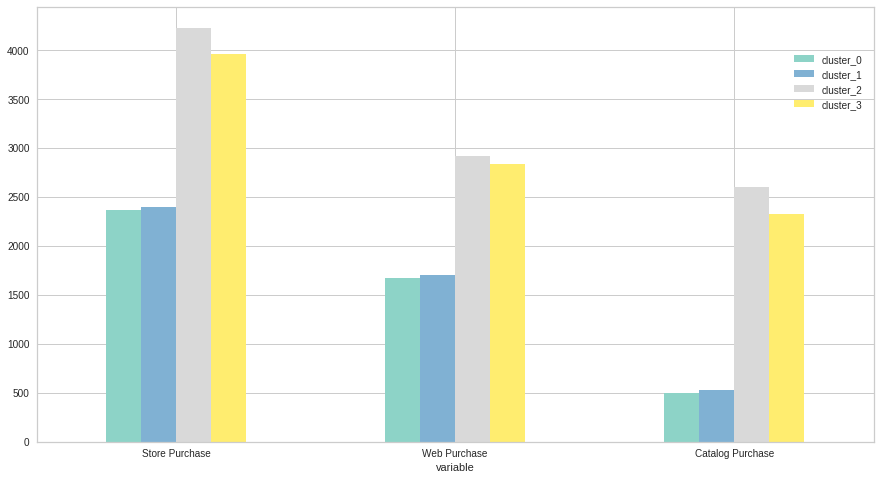

In [ ]:
df_merged.plot(x='variable', y=['cluster_0','cluster_1','cluster_2','cluster_3'], kind='bar', colormap='Set3', figsize = (15,8))
plt.legend(bbox_to_anchor=(0.9, 0.9), loc='upper left', borderaxespad=0)
plt.xticks(rotation=0)

#### 7.4.4 Deals Purchase

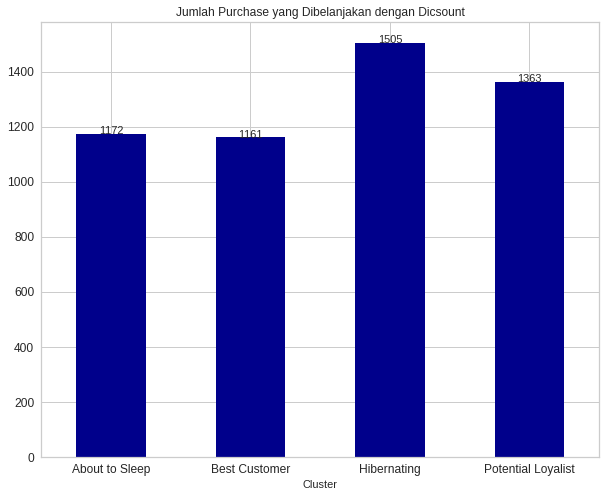

In [ ]:
ax = df_baru4.groupby('Cluster')['Deals Purchase'].sum().plot(kind='bar', figsize=(10,8), legend = None, color = 'darkblue')
plt.xticks(rotation=0, fontsize=12)
plt.yticks(rotation=0, fontsize=12)
plt.title('Jumlah Purchase yang Dibelanjakan dengan Dicsount')
for rect in ax.patches:
  ax.text (rect.get_x() + rect.get_width()  / 2,rect.get_height()+ 0.25,rect.get_height(),horizontalalignment='center', fontsize = 11)

- Customer kategori hibernating dan potential loyalist banyak yang melakukan pembelian dengan discount. Dalam strategi marketing,  dapat dilakukan pemberian discount atau voucher untuk bisa meningkatkan frekuensi belanja dari jenis customer tersebut

#### 7.4.5 Pemasukan Berdasarkan Kategori Item

In [ ]:
amount = df_baru4[['Wines','Fruits','Meats','Fish','Sweets','Gold','cluster']]
amount.head()

,Wines,Fruits,Meats,Fish,Sweets,Gold,cluster
0,635,88,546,172,88,88,2
1,11,1,6,2,1,6,0
2,426,49,127,111,21,42,3
3,11,4,20,10,3,5,0
4,173,43,118,46,27,15,1


In [ ]:
amt_0 = pd.melt(amount[amount.cluster==0][['Wines','Fruits','Meats','Fish','Sweets','Gold']])
amt_1 = pd.melt(amount[amount.cluster==1][['Wines','Fruits','Meats','Fish','Sweets','Gold']])
amt_2 = pd.melt(amount[amount.cluster==2][['Wines','Fruits','Meats','Fish','Sweets','Gold']])
amt_3 = pd.melt(amount[amount.cluster==3][['Wines','Fruits','Meats','Fish','Sweets','Gold']])

In [ ]:
fig = make_subplots(rows=2, cols=2,subplot_titles=('Pemasukan dari Potential Loyalist', 'Pemasukan dari Hibernating', 'Pemasukan dari About to Sleep','Pemasukan dari Best Customer'),shared_yaxes=True, vertical_spacing=0.3)
fig.add_trace(go.Histogram(histfunc='sum',x=amt_0['variable'],y=amt_0['value'], marker_color='Orange',texttemplate='%{y}'),row=1,col=1)
fig.add_trace(go.Histogram(histfunc='sum',x=amt_1['variable'],y=amt_1['value'], marker_color='Lightcoral',texttemplate='%{y}'),row=1,col=2)
fig.add_trace(go.Histogram(histfunc='sum',x=amt_2['variable'],y=amt_2['value'], marker_color='thistle',texttemplate='%{y}'),row=2,col=1)
fig.add_trace(go.Histogram(histfunc='sum',x=amt_3['variable'],y=amt_3['value'], marker_color='lightsalmon',texttemplate='%{y}'),row=2,col=2)
fig.update_layout(showlegend=False, template='plotly_white', yaxis_range=[0,55000], yaxis3_range=[0,400000],height=800, 
    width=1000, yaxis={'categoryorder':'total descending'})

- Potential loyalist dan hibernating memiliki nilai pengeluaran yang tidak banyak dan dari mereka banyak mengeluarkan uangnya untuk wine, meat dan gold
- About to sleep dan best customer memiliki nilai pengeluaran yang besar dengan pengeluaran terbanyak adalah wine dan meat
- Hal ini bisa digunakan untuk memberikan penawaran menarik berdasarkan produk terlaris kepada para customer untuk bisa meningkatkan pembelian di produk tertentu

#### 7.4.6 Profiling

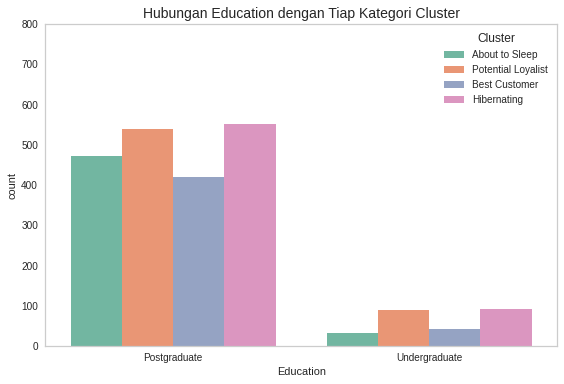

In [ ]:
ax = sns.countplot(x = df_baru4['Education'] , hue='Cluster', data=df_baru4, palette = 'Set2')
# Turns off grid on the left Axis.
ax.grid(False)
plt.title(f'Hubungan Education dengan Tiap Kategori Cluster',fontsize=14)
plt.ylim(0,800)
plt.tight_layout()

- Secara keseluruhan, customer dari tiap kategori sudah menyelesaikan pendidikannya. Hal ini bisa digunakan untuk menyesuaikan produk yang akan dijual berdasarkan kebutuhan untuk kelompo customer yang sudah lulus

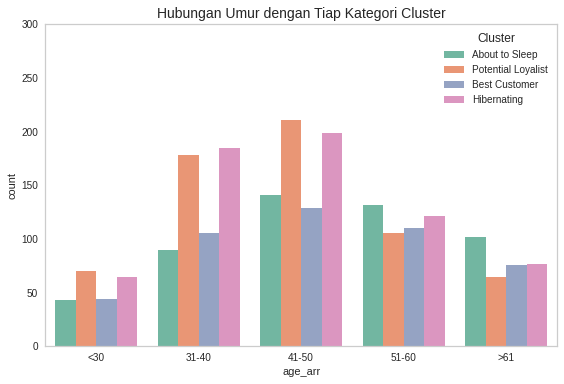

In [ ]:
order = ['<30', '31-40', '41-50', '51-60', '>61']
ax = sns.countplot(x = df_baru4['age_arr'] , hue='Cluster', data=df_baru4, order = order, palette = 'Set2')
# Turns off grid on the left Axis.
ax.grid(False)
plt.title(f'Hubungan Umur dengan Tiap Kategori Cluster',fontsize=14)
plt.ylim(0,300)
plt.tight_layout()


- Secara keseluruhan, customer dari tiap kategori memiliki usia antara 31-50 tahun. Hal ini bisa digunakan untuk meningkatkan penawaran bertarget dan menyesuaikan produk yang akan dijual berdasarkan kebutuhan untuk kelompok usia tersebut

Text(44.125, 0.5, 'Marital Status')

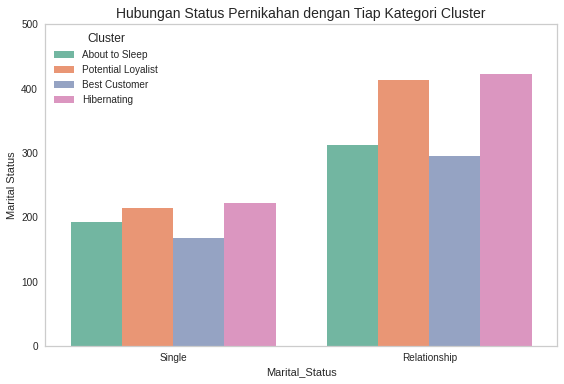

In [ ]:
ax = sns.countplot(x = df_baru4['Marital_Status'] , hue='Cluster', data=df_baru4, palette = 'Set2')
# Turns off grid on the left Axis.
ax.grid(False)
plt.title(f'Hubungan Status Pernikahan dengan Tiap Kategori Cluster',fontsize=14)
plt.ylim(0,500)
plt.tight_layout()
plt.ylabel('Marital Status')


- Secara keseluruhan, customer dari tiap kategori dalam kondisi relationship

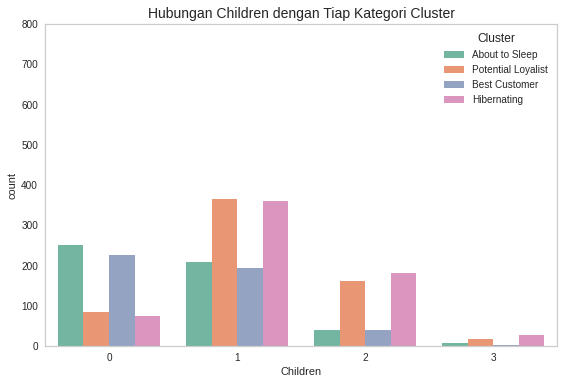

In [ ]:
ax = sns.countplot(x = df_baru4['Children'] , hue='Cluster', data=df_baru4, palette = 'Set2')
# Turns off grid on the left Axis.
ax.grid(False)
plt.title(f'Hubungan Children dengan Tiap Kategori Cluster',fontsize=14)
plt.ylim(0,800)
plt.tight_layout()

- Jenis customer potential loyalist dan hibernating memiliki children sebanyak 1
- Jenis customer about to sleep dan best customer memiliki children sebanyak 0
- Customer yang tidak memiliki anak cenderung memiliki pengeluaran yang lebih besar daripada customer yang memiliki anak dikarenakan ada kebutuhan lain lain yang harus dibeli ditempat lain pula serta cenderung mempertimbangkan pengeluaran dari berbagai aspek.

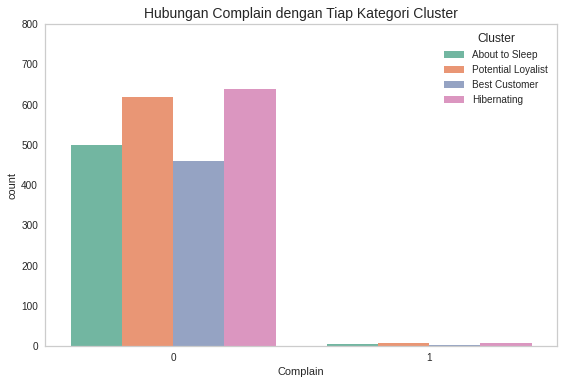

In [ ]:
ax = sns.countplot(x = df_baru4['Complain'] , hue='Cluster', data=df_baru4, palette = 'Set2')
# Turns off grid on the left Axis.
ax.grid(False)
plt.title(f'Hubungan Complain dengan Tiap Kategori Cluster',fontsize=14)
plt.ylim(0,800)
plt.tight_layout()


- Secara keseluruhan customer merasa puas terhadap performa perusahaan dan tidak banyak yang melakukan complain

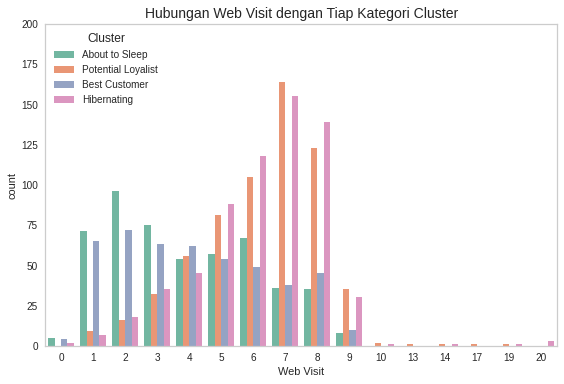

In [ ]:
ax = sns.countplot(x = df_baru4['Web Visit'] , hue='Cluster', data=df_baru4, palette = 'Set2')
# Turns off grid on the left Axis.
ax.grid(False)
plt.title(f'Hubungan Web Visit dengan Tiap Kategori Cluster',fontsize=14)
plt.ylim(0,200)
plt.tight_layout()

- Customer potential loyalist dan hibernating banyak yang mengunjungi web store 7-8 kali. Artinya customer tersebut memang sudah memiliki ketertarikan untuk belanja dan melihat katalog produk perusahaan. Namun ada beberapa hal yang menjadi pertimbangan bagi customer ini untuk berbelanja. 
- Customer about to sleep dan best customer banyak yang mengunjungi web store antara 2-3 kali. Customer jenis ini lebih suka untuk berbelanja dan memilih secara langsung di store daripada melalui web

## 8. Profiling & Conclusion

1. Potential Loyalist
- Recency = 0-20
- Age = 42-46 tahun
- Education = Graduate
- Children = 1
- Marital Status = Relationship
- Income Range = 0 - 70.000
2. Hibernating
- Recency = 61-80
- Age = 42-46 tahun
- Education = Graduate
- Children = 1
- Marital Status = Relationship
- Income Range = 0 - 70.000
3. About to Sleep
- Recency = 61-80
- Age = 42-46 tahun
- Education = Graduate
- Children = 0
- Marital Status = Relationship
- Income Range = 40.000 - 100.000
4. Best Customer
- Recency = 0-20
- Age = 42-46 tahun
- Education = Graduate
- Children = 0
- Marital Status = Relationship
- Income Range = 40.000 - 100.000

## 9. Recommendation

1.  **Potential Loyalist**  
Pada jenis customer ini perlu dilakukan adanya peningkatan terhadap frekuensi dan total transaksi yang dilakukan. Hal ini bisa dilakukan dengan: 
- Membuat penawaran untuk meningkatkan pembelian mereka dalam bentuk voucher atau diskon yang akan berlaku jika transaksi mereka mencapai batas yang diinginkan
- Meningkatkan frekuensi dilakukannya campaign 6 karena customer ini banyak menerima penawaran dari campaign 6
- Memberikan penawaran lebih untuk jenis produk wines, meat dan gold kepada customer ini
2. **At Risk**  
Jenis customer ini merupakan customer terbanyak sehingga perlu diberikan perlakukan khusus untuk mengatasi permasalahannya. Langkah awal yang bisa dilakukan adalah dengan membuat customer ini bertransaksi dengan: 
- Memberikan penawaran melalui email, pesan, atau platform lain tentang rekomendasi produk yang banyak dicari customer ini dan diiringi dengan penawaran menarik dapat dilakukan
- Dilakukannya peningkatan frekuensi campaign 3 dan 6  karena customer ini banyak menerima penawaran dari campaign 3 dan 6
- Menerapkan system shopping sticker yang dimana jika customer mampu mengumpulkan stickerr transaksi belanja akan diberikan gift atau voucher
- Memfokuskan untuk mengimplementasikan rekomendasi ini di store secara langsung yang mayoritas customer belanja di store
3. **About to Sleep** 
Performa customer ini termasuk dalam kondisi yang baik hanya perlu ditingkatkan dd\engan:
- Memberikan penawaran melalui email, pesan, atau platform lain tentang rekomendasi produk yang banyak dicari customer ini dan diiringi dengan penawaran menarik dapat dilakukan untuk membuat customer ini bertransaksi.
- Meminta feedback kepada customer terkait hal apa saja yang harus ditingkatkan, diperbaiki, dan dipertahankan.
- Dilakukannya peningkatan frekuensi campaign 5  karena customer ini banyak menerima penawaran dari campaign tersebut
- Memberikan penawaran yang lebih menarik untuk kategori produk wine dan meat
4. **Best Customer** = Customer ini merupakan jenis customer yang paling berharga untuk perusahaan karena performanya baik dalam segi apapun. Customer ini bisa diberikan reward atau gift atas pencapaiannya dan supaya bisa tetap loyal untuk berbelanja di perusahaan. 